# Predicting Heart Failure

## A. Introduction

Cardiovascular diseases are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management where a machine learning model can be of great help.

**Numerical Features:**
- age: age of the patient (years)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- time: follow-up period (days)

**Categorical Features:**
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- diabetes: if the patient has diabetes (boolean)
- sex: woman or man (binary)
- smoking: if the patient smokes or not (boolean)

**Target Variable:**
- death event: if the patient deceased during the follow-up period (boolean)

## B. Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/heartFailure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.shape

(299, 13)

Dataset consists of 299 observations (rows) and 13 features (columns).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data has only float and integer values. No column has null/ missing values

In [7]:
# Get column names
column_names = df.columns
print(column_names)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [8]:
# Get column data types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

age is unique: False
anaemia is unique: False
creatinine_phosphokinase is unique: False
diabetes is unique: False
ejection_fraction is unique: False
high_blood_pressure is unique: False
platelets is unique: False
serum_creatinine is unique: False
serum_sodium is unique: False
sex is unique: False
smoking is unique: False
time is unique: False
DEATH_EVENT is unique: False


is_unique attribute indicates that the underlying in the given series objects are not unique. Therefore, those objects contain duplicates.

## C. Univariate Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


- Note that anaemia, diabete, high blood pressure, and smoking are rather a categorical features despite of having numerical values. Therefore, those features don't have a mean and a standard deviation. They only have a mode.
- Mean is greater than median for the numerical attribute. Therefore, the distribution is positively skewed.

### 1. Target Variable (if categorical)

In [11]:
df.DEATH_EVENT.unique()

array([1, 0])

The target variable DEATH_EVENT is discrete and it is a classification problem.

In [12]:
 # As it is a categorical variable, we will look at its frequency table, percentage distribution and bar plot.
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

- 203 patients survived.
- 96 patients deceased.

In [13]:
# Normalize can be set to True to print proportions instead of number 
df['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

- 67.89 % of the patients survived.
- 32.11 % of the patients deceased.

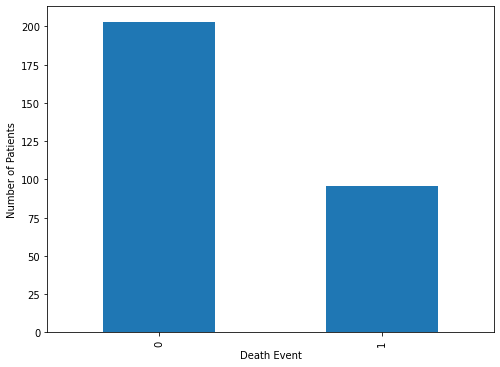

In [14]:
plt.figure(figsize=(8,6))
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.ylabel('Number of Patients')
plt.xlabel('Death Event')
plt.show()

<AxesSubplot:title={'center':'Death Event'}>

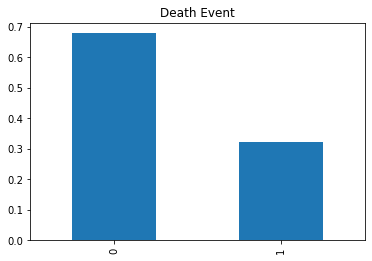

In [15]:
df['DEATH_EVENT'].value_counts(normalize=True).plot.bar(title= 'Death Event')

- The distribution is imbalanced. There are more patients that survived than patients that deceased. 

### 2. Independent Variables

### 2. a) Age

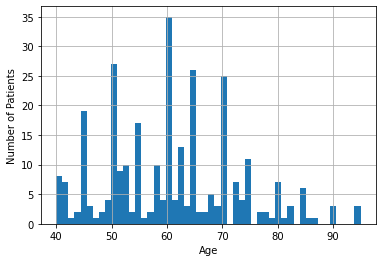

In [16]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

- The highest number of patients falls within the 60 to 70 years bin. 
- The age ranges from 40 to 95 years.

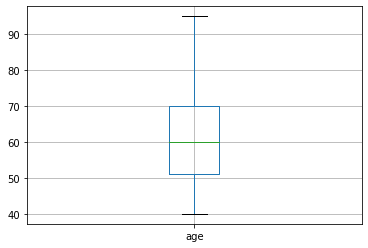

In [17]:
df.boxplot(column='age')
plt.show()

- 25 % of the patients are below 50 years old and 75 % are above 50 years old (25 % percentile).
- 50 % of the patients are below 60 years old and 50 % are above 60 years old (median).
- 75 % of the patients are below 70 years old and 25 % are above 70 years old (75 % percentile).

### 2. b) Sex

For the categorical (non-numerical) attributes (e.g. sex, anaemia, high blood pressure, etc.), we can look at the count of each value/category (frequency tables) to understand how well each category is represented in the dataset.

In [18]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

- 194 of the patients are men and 105 of the patients are female.
- We can see that the number of males in the dataset is almost more than two times larger than the number of females.

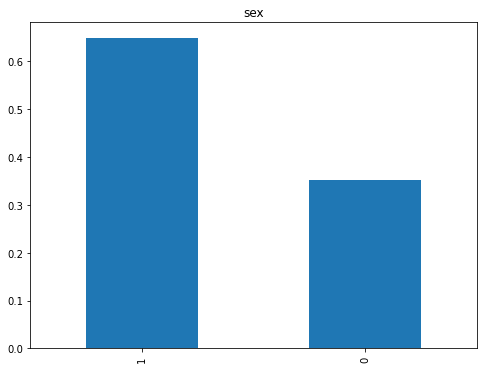

In [19]:
plt.figure(figsize=(8,6))
df['sex'].value_counts(normalize=True).plot.bar(title= 'sex') 
plt.show()

- Over 60 % of the patients are male. 
- Less than 40 % of the patients are female.

In [20]:
df['sex'].count()

299

- There are no missing values for the attribute sex.

### 2. c) Anaemia

In [21]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

- 170 patients have anaemia.

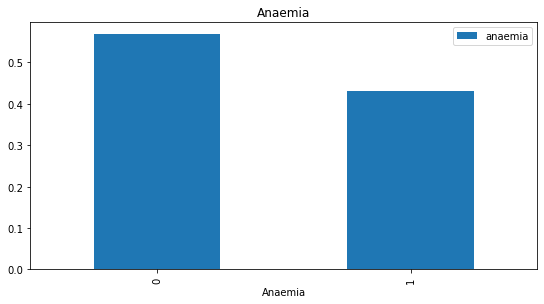

In [22]:
plt.figure(figsize=(8,6))
plt.subplot(221)
df['anaemia'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Anaemia') 
plt.xlabel('Anaemia')
plt.legend()
plt.show()

- More than half of all patients (approx. 55 %) have anaemia.

In [23]:
df['anaemia'].count()

299

- There are no missing values for the attribute anaemia.

### 2. d) High Blood Pressure

In [24]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

- 194 patient have high blood pressure.

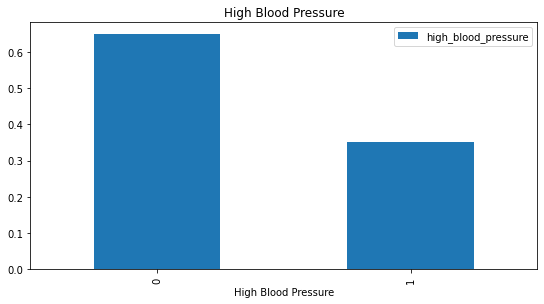

In [25]:
plt.figure(figsize=(8,6)) 
plt.subplot(221)
df['high_blood_pressure'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'High Blood Pressure') 
plt.xlabel('High Blood Pressure')
plt.legend()
plt.show()

- More than 60 % of all patients (approx. 65 %) have high blood pressure.

In [26]:
df['high_blood_pressure'].count()

299

- There are no missing values for the attribute high blood pressure.

### 2. e) Diabetes

In [27]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

- 174 patients have diabetes.

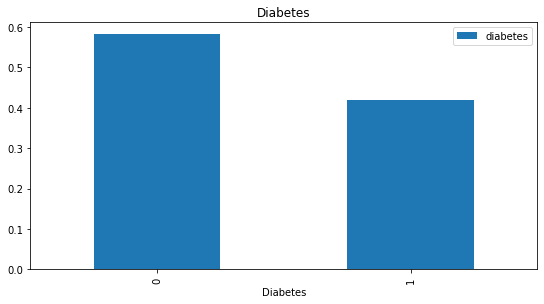

In [28]:
plt.figure(1) 
plt.subplot(221)
df['diabetes'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Diabetes') 
plt.xlabel('Diabetes')
plt.legend()
plt.show()

- Almost 60 % of all patients have diabetes.

In [29]:
df['diabetes'].count()

299

- There are no missing values for the attribute diabetes.

### 2. f) Smoking

In [30]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

- 203 patients are smokers.

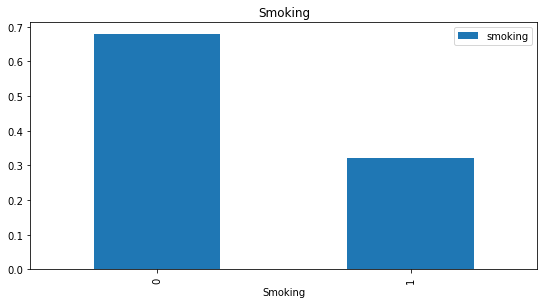

In [31]:
plt.figure(1) 
plt.subplot(221)
df['smoking'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Smoking') 
plt.xlabel('Smoking')
plt.legend()
plt.show()

- Almost 70 % of all patients are smokers.

In [32]:
df['smoking'].count()

299

- There are no missing values for the attribute diabetes.

## D. Bivariate Analysis

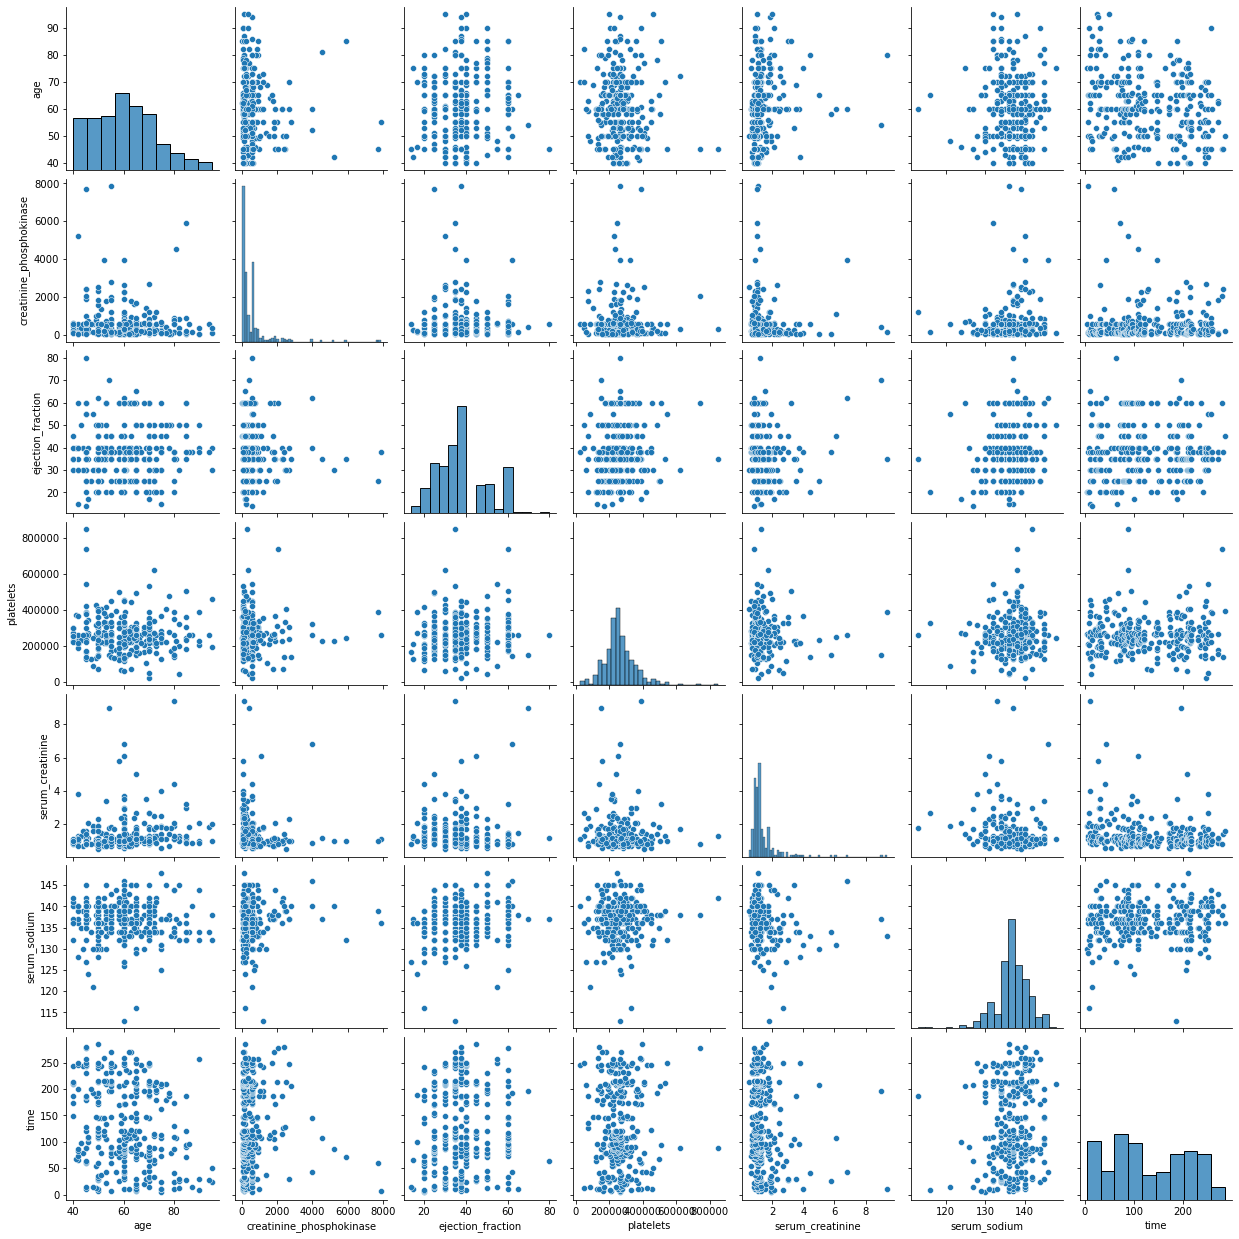

In [33]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','creatinine_phosphokinase','ejection_fraction','platelets', 'serum_creatinine', 'serum_sodium', 'time']].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

In [34]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


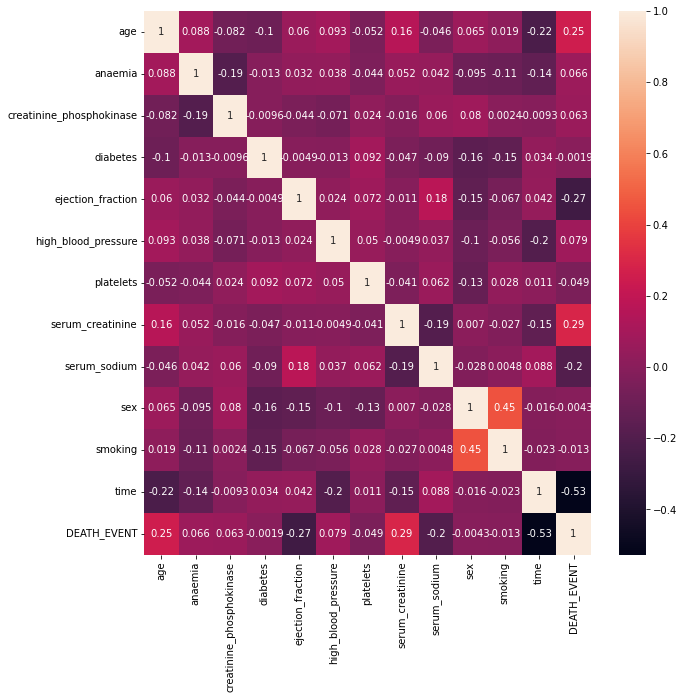

In [35]:
plt.figure(figsize=(10,10))
#correlation matrix
sns.heatmap(df.corr(),annot = True)
plt.show()

- The heat map suggests correlation greater than 0 between DEATH_EVENT and the two attributes age and serum_creatinine. 
- There is also a correction between ejection_fraction and serum_sodum.

### Death Event vs. Age

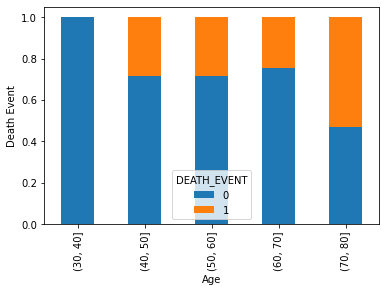

In [36]:
bins=[20,30,40,50,60,70,80] # bin range

df['extra_col']=pd.cut(df['age'],bins)
age=pd.crosstab(df['extra_col'],df['DEATH_EVENT']) 
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Age') 
P = plt.ylabel('Death Event')

- Half of the patients between 70 and 80 years old died.
- All patients between 30 and 40 years old survided.

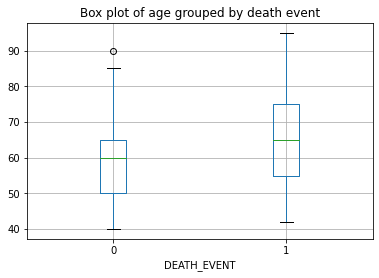

In [37]:
# Boxp lots of age grouped by the categorical attribute death event
df.boxplot(column='age', by='DEATH_EVENT')
plt.title('Box plot of age grouped by death event')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

- Patients that survived are between 50 and 85, while patients that deceased are between 55 and 95. 
- The median age of the patients that deceased is higher than the median age of the patients that survived. Therefore, in average the deceased patients are older than the survived patients.
- There is an outliers (90 years old patient) that survived.

Let's redraw the box plots of DEATH_EVENT grouped by the categorical attribute age as violin plots.

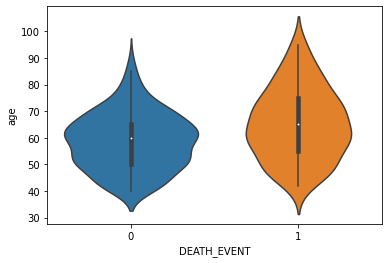

In [38]:
sns.violinplot(data=df, x='DEATH_EVENT', y='age')
plt.show()

We can split each violin plot by a binary attribute. For example, we can add sex to the plot above as follows.

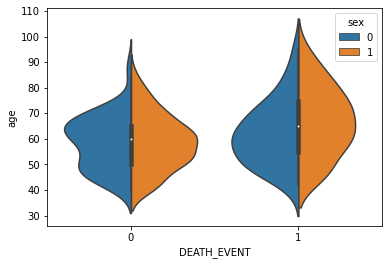

In [39]:
sns.violinplot(data=df, x='DEATH_EVENT', y='age', hue='sex', split=True)
plt.show()

### Death Event vs. Serum Creatinine

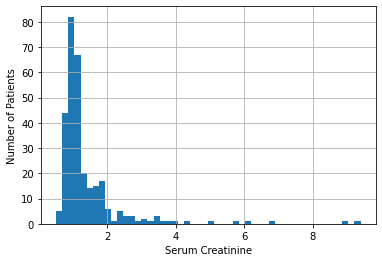

In [40]:
# Next, we examine a histogram of the numerical attribute Serum Creatinine
df['serum_creatinine'].hist(bins=50)
plt.xlabel('Serum Creatinine')
plt.ylabel('Number of Patients')
plt.show()

Most of the patients have lower serum creatinine values.

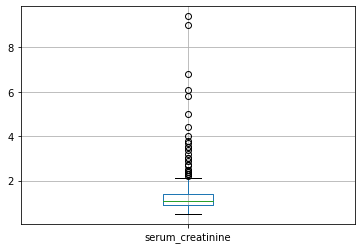

In [41]:
# Boxplot of Serum Creatinine
df.boxplot(column='serum_creatinine')
plt.show()

But there are some outliers who have really high values for serum creatinine.

Let's examine the relationship between age and serum_creatinine with a scatter plot.

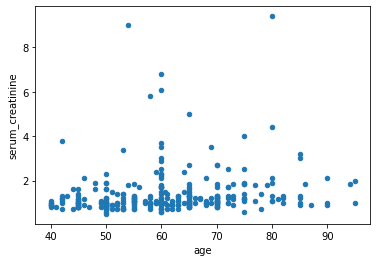

In [42]:
df.plot.scatter(x='age', y='serum_creatinine')
plt.show()

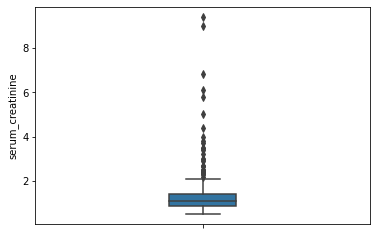

In [43]:
#First, let's draw a seaborn-style box plot for Serum Creatinine
sns.boxplot(y=df['serum_creatinine'], orient='v', width=0.2)
plt.show()

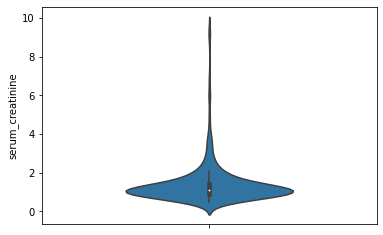

In [44]:
#Violin plot for Serum Creatinine
sns.violinplot(y=df['serum_creatinine'], width=0.5)
plt.show()

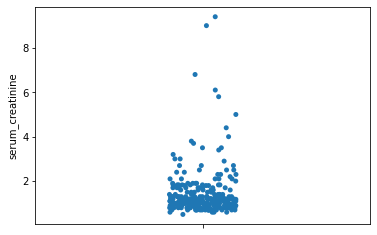

In [45]:
#Strip plot for Serum Creatinine
sns.stripplot(y=df['serum_creatinine'], jitter=True, orient='v')
plt.show()

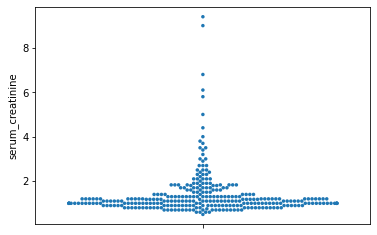

In [46]:
#Swarmplot for Serum Creatinine
sns.swarmplot(y=df['serum_creatinine'], orient='v', size = 3.5)
plt.show()

### Death Event vs. Sex

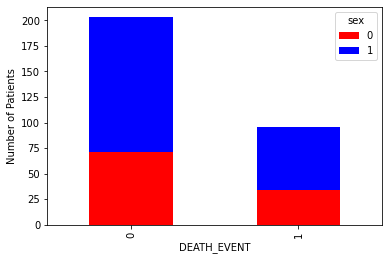

In [47]:
crosstab_CL = pd.crosstab(df['DEATH_EVENT'], df['sex'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Patients')
plt.show()

There are more male patients deceased/ survived than female patients. But there are also more male than female patients in the dataset.

### Death Event vs. Sex vs.  Diabetes

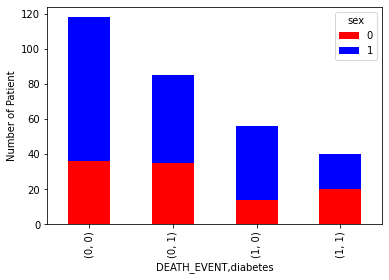

In [48]:
crosstab_CGL = pd.crosstab([df['DEATH_EVENT'], df['diabetes']], df['sex'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Patient')
plt.show()

- The first group (0,0) shows all survived patients with diabetes for both male (blue) and for female (red).  
- The second group shows all survived patients with no diabetes. 
- The third group shows all deceased patients with diabetes. 
- The fourth group shows all deceased patients with no  diabetes.

### Death Event vs. Sex vs. High Blood Pressure

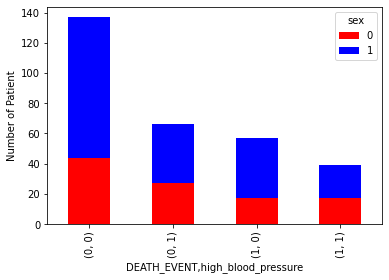

In [49]:
crosstab_CGL = pd.crosstab([df['DEATH_EVENT'], df['high_blood_pressure']], df['sex'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Patient')
plt.show()

- The first group (0,0) shows all survived patients with high blood pressure for both male (blue) and for female (red).  
- The second group shows all survived patients with no high blood pressure. 
- The third group shows all deceased patients with high blood pressure. 
- The fourth group shows all deceased patients with no high blood pressure.

## E. Splitting Dataset into Subsets

The objective of this study is the influence of the variables on the target variable (if the patient deceased during the follow-up period or not). 

We will split the data into two subsets:
- hf1 Subset : All samples with value 1 of Death Event
- hf0 Subset: All samples with value 0 of Death Event

In [50]:
hf1 = df[df.DEATH_EVENT==1]
hf0 = df[df.DEATH_EVENT==0]

In [51]:
hf1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,extra_col
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1,"(70, 80]"
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1,"(50, 60]"
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1,"(60, 70]"
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1,"(40, 50]"
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1,"(60, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1,"(70, 80]"
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1,"(50, 60]"
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1,"(50, 60]"
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1,"(60, 70]"


In [52]:
hf0

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,extra_col
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0,"(40, 50]"
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0,"(60, 70]"
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0,"(50, 60]"
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0,"(40, 50]"
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,"(60, 70]"
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0,"(50, 60]"
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0,"(40, 50]"
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,"(40, 50]"


Text(0.5, 1.0, 'Count Plot for Death Event')

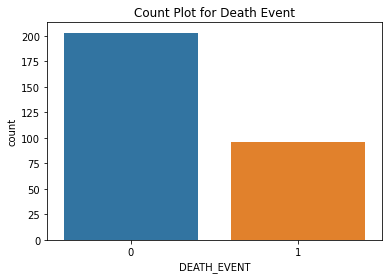

In [53]:
## creating count plot with title using seaborn
sns.countplot(x=df.DEATH_EVENT)
plt.title("Count Plot for Death Event")

- Approximately 200 parients survived.
- Approximately 100 patients died in the follow-up period.

Text(0.5, 1.0, 'Boxplot for Age by Death Event')

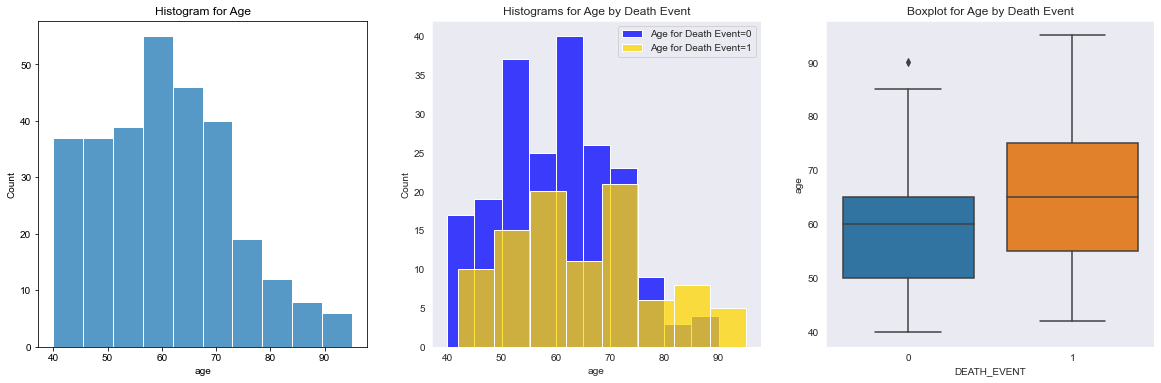

In [54]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.histplot(df.age,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.age,kde=False,color="Blue", label="Age for Death Event=0")
sns.histplot(hf1.age,kde=False,color = "Gold", label = "Age for Death Event=1")
plt.title("Histograms for Age by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.age)
plt.title("Boxplot for Age by Death Event")

- According to the Histogram Age by Death Event, more older people died.
- According to the Boxplot Age by Death Event, deceased patients were older in average than not deceased patients. There is one outlier in the not deceased subset of the data set.

Text(0.5, 1.0, 'Boxplot for Creatinine Phosphokinase by Death Event')

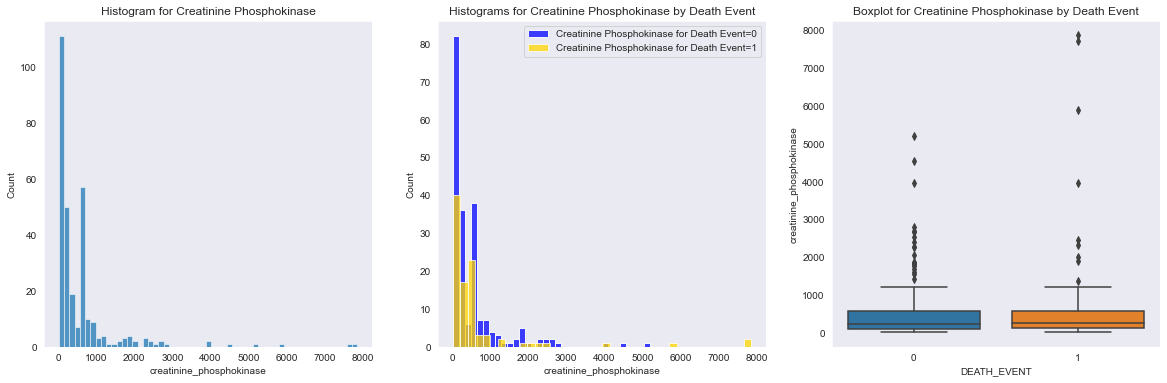

In [55]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Creatinine Phosphokinase")
sns.histplot(df.creatinine_phosphokinase,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.creatinine_phosphokinase,kde=False,color="Blue", label="Creatinine Phosphokinase for Death Event=0")
sns.histplot(hf1.creatinine_phosphokinase,kde=False,color = "Gold", label = "Creatinine Phosphokinase for Death Event=1")
plt.title("Histograms for Creatinine Phosphokinase by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.creatinine_phosphokinase)
plt.title("Boxplot for Creatinine Phosphokinase by Death Event")

- Mostly levels of Creatinine Phosphorkinase are low. Only a few higher level of Creatinine Phosphorkinase.
- It doesn't look like that Creatine Phosphorkinase is somehow related to the death event.
- Both datasets have the same median for the level of the CPK enzyme in the blood. There are a few outliers in both data sets.

Text(0.5, 1.0, 'Boxplot for Ejection Fraction by Death Event')

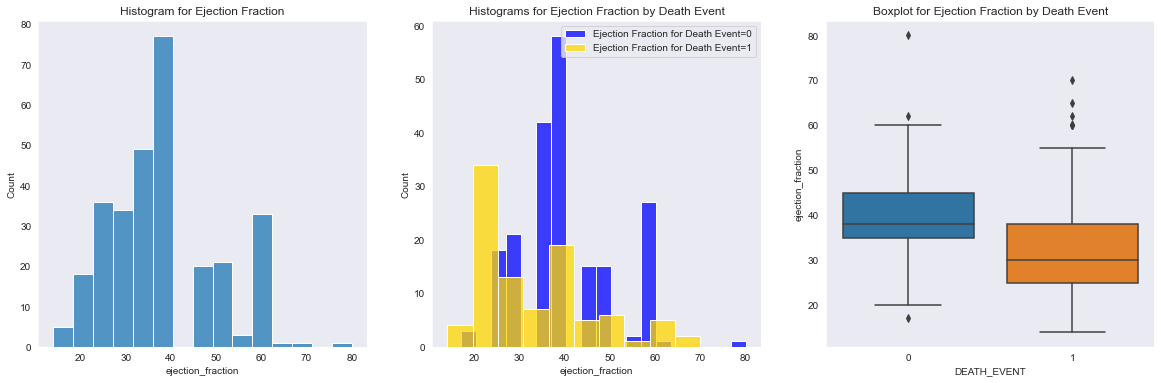

In [56]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Ejection Fraction")
sns.histplot(df.ejection_fraction,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.ejection_fraction,kde=False,color="Blue", label="Ejection Fraction for Death Event=0")
sns.histplot(hf1.ejection_fraction,kde=False,color = "Gold", label = "Ejection Fraction for Death Event=1")
plt.title("Histograms for Ejection Fraction by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.ejection_fraction)
plt.title("Boxplot for Ejection Fraction by Death Event")

- According to the Histogram Ejection Fraction by Death Event, deceased patients had lower ejection fractions than survived patients.
- According to the Boxplot Ejection Fraction by Death Event, median ejection fraction of deceased patients is lower than of not deceased patients. Survived patients tend to have higher ejection fraction than deceased patients.

Text(0.5, 1.0, 'Boxplot for Platelets by Death Event')

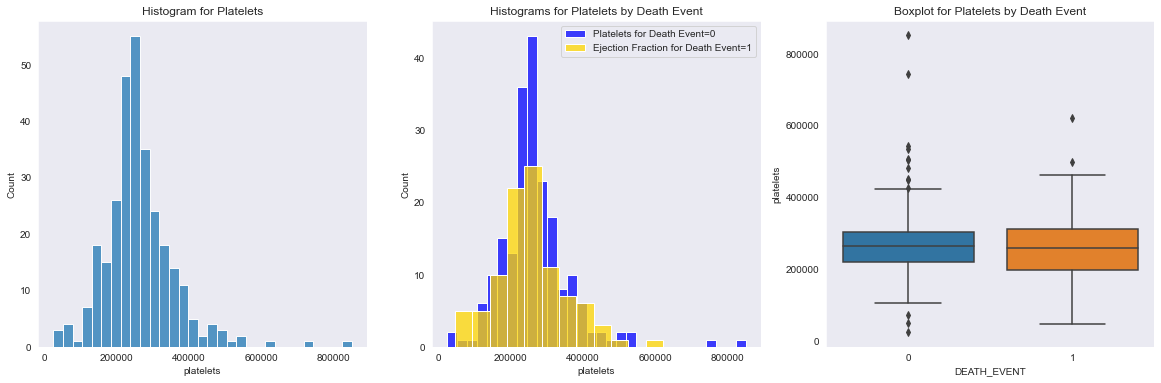

In [57]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Platelets")
sns.histplot(df.platelets,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.platelets,kde=False,color="Blue", label="Platelets for Death Event=0")
sns.histplot(hf1.platelets,kde=False,color = "Gold", label = "Ejection Fraction for Death Event=1")
plt.title("Histograms for Platelets by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.platelets)
plt.title("Boxplot for Platelets by Death Event")

According to Boxplot Platelets by Death Event the median is the same for both subsets.

Text(0.5, 1.0, 'Boxplot for Serum Creatinine by Death Event')

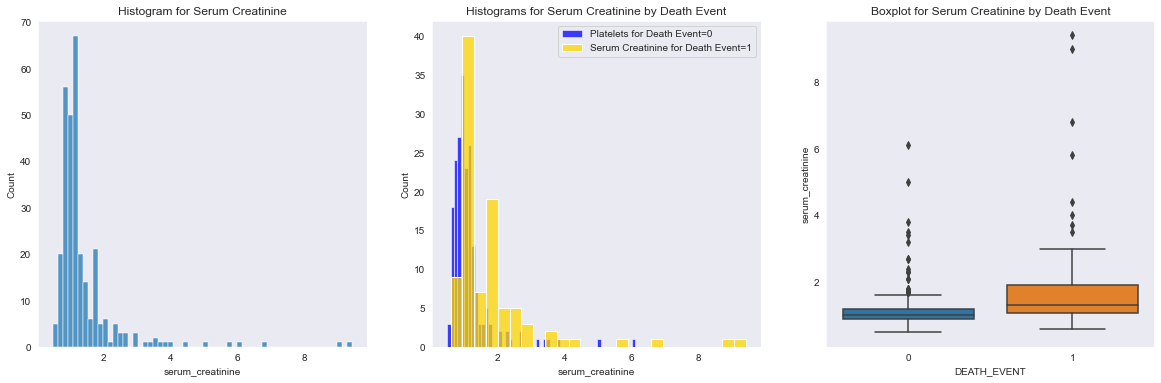

In [58]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Serum Creatinine")
sns.histplot(df.serum_creatinine,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.serum_creatinine,kde=False,color="Blue", label="Platelets for Death Event=0")
sns.histplot(hf1.serum_creatinine,kde=False,color = "Gold", label = "Serum Creatinine for Death Event=1")
plt.title("Histograms for Serum Creatinine by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.serum_creatinine )
plt.title("Boxplot for Serum Creatinine by Death Event")

Text(0.5, 1.0, 'Boxplot for Serum Sodium by Death Event')

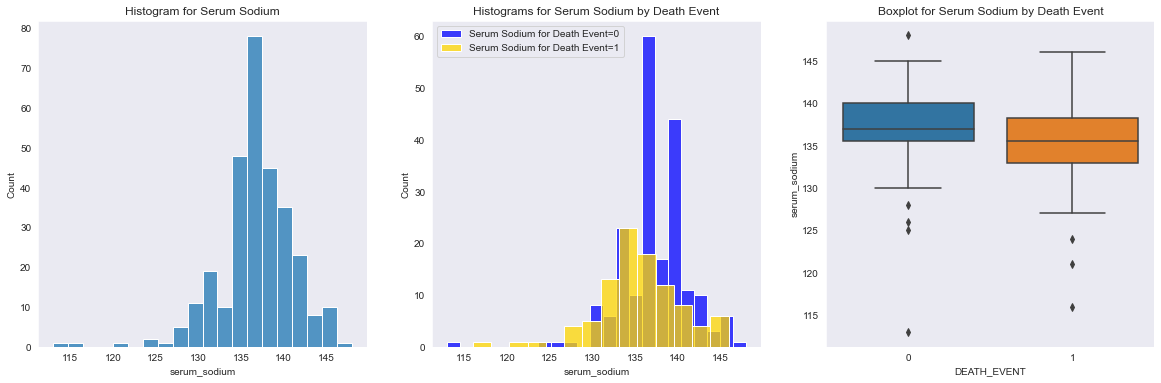

In [59]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Serum Sodium")
sns.histplot(df.serum_sodium,kde=False)
plt.subplot(1,3,2)
sns.histplot(hf0.serum_sodium,kde=False,color="Blue", label="Serum Sodium for Death Event=0")
sns.histplot(hf1.serum_sodium,kde=False,color = "Gold", label = "Serum Sodium for Death Event=1")
plt.title("Histograms for Serum Sodium by Death Event")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.DEATH_EVENT,y=df.serum_sodium )
plt.title("Boxplot for Serum Sodium by Death Event")  